In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action= "ignore")

In [2]:
from matplotlib import style
style.use('fivethirtyeight')

#                                                  Reggression Project (2)
 
 

## Contents
1.  Introduction
2.  The Aim of Analysis
3.  General Information of the Data
4.  Arrangements of the Data Sets
5.  Filling of the Row Data 
6.  Data Exploration 
7.  Splitting the Data
8.  Training the Model
9.  Predicting the Model
10. Evaluating the Model
11. Conclusions

**1. Introduction**

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

**2. The Aim of Analysis**

This study aims to search for the elements which effects life expectancy by using correlations with regression models.

**3. General Information of the Data**

Country : Country

Year : Year 

Status : Developed or Developing status

Life expectancy : Life Expectancy in age

Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths : Number of Infant Deaths per 1000 population


Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage:  expenditureExpenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles : Measles - number of reported cases per 1000 population

BMI : Average Body Mass Index of entire population

under-five deaths : Number of under-five deaths per 1000 population

Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria :  Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP : Gross Domestic Product per capita (in USD)

Population : Population of the country

thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling : Number of years of Schooling(years)

**4. Data Exploration**

In [3]:
LifeExpectancyData = pd.read_csv('data/LifeExpectancyData.csv')
LifeExpectancyData.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [4]:
LifeExpectancyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
LifeExpectancyData.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

We have a lot of missing population values in  many countries. We alsa have GDP values from population for each countries as well. Therefore, I preferred to drop coloumn from data frame.

In [6]:
LifeExpectancyData.columns 

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
LifeExpectancyData.columns= ['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP','Population', 'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling']

In [8]:
bos_hucre_toplam = LifeExpectancyData.isnull().sum()
bos_hucre_yuzde = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()
bos_degerler = pd.concat([bos_hucre_toplam, bos_hucre_yuzde], axis=1, keys=['bos_toplam', 'bos_yuzde'])
bos_degerler = bos_degerler.sort_values('bos_toplam', ascending=False)

In [9]:
def bos_hucre(LifeExpectancyData):
    bos_hucre_toplam = LifeExpectancyData.isnull().sum()
    bos_hucre_yuzde = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()
    bos_degerler = pd.concat([bos_hucre_toplam, bos_hucre_yuzde], axis=1, keys=['bos_toplam', 'bos_yuzde'])
    bos_degerler = bos_degerler.sort_values('bos_toplam', ascending=False)
    return bos_degerler[bos_degerler['bos_toplam'] > 0]

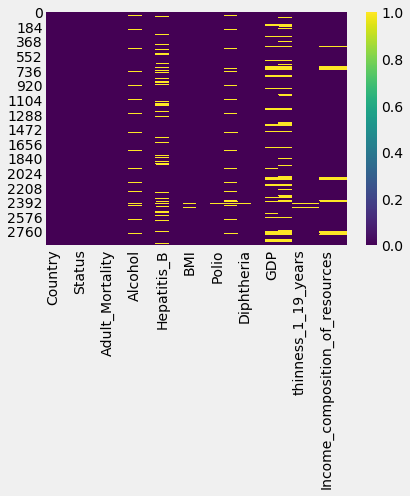

In [10]:
sns.heatmap(LifeExpectancyData.isnull(),cmap='viridis')

**4.a. Importing an Extarnel Data Frame**

***Further steps requires extra tools to compare and to group row data for cleaning and filling Null values. Therefore, I imported another data frame with neccessary columns.**

In [11]:
regions = pd.read_csv('./data/all.csv')

In [12]:
regions.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.000,34.000,nan
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.000,154.000,nan
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.000,39.000,nan
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.000,15.000,nan
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.000,61.000,nan


In [13]:
regions[['name', 'region', 'sub-region']].isnull().sum()

name          0
region        1
sub-region    1
dtype: int64

In [14]:
regions.columns

Index(['name', 'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

**4.b. Merging two data frame in one, LifeExpectancyData_merged, will help us to fill in accurately.**

In [15]:
LifeExpectancyData_merged = pd.merge(LifeExpectancyData, regions[['name', 'region', 'sub-region']], left_on='Country', right_on='name')

In [16]:
bos_hucre(LifeExpectancyData_merged)

,bos_toplam,bos_yuzde
Population,556,0.197
Hepatitis_B,536,0.190
GDP,352,0.125
Total_Expenditure,204,0.072
Alcohol,187,0.066
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012


In [17]:
LifeExpectancyData_merged.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,HIV/AIDS,GDP,Population,thinness_1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling,name,region,sub-region
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100,Afghanistan,Asia,Southern Asia
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,0.100,612.697,327582.000,17.500,17.500,0.476,10.000,Afghanistan,Asia,Southern Asia
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900,Afghanistan,Asia,Southern Asia
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800,Afghanistan,Asia,Southern Asia
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500,Afghanistan,Asia,Southern Asia


**5. Cleaning of the Row Data**

There is a high number of Null values on Population column. We already have GDP values on each countries so I prefered to drop it.

In [18]:
LifeExpectancyData_merged.drop('Population', inplace=True, axis=1)

In [19]:
LifeExpectancyData_merged.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness_1_19_years',
       'thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'name', 'region', 'sub-region'],
      dtype='object')

In [20]:
fill_list = (bos_hucre(LifeExpectancyData_merged)).index

In [21]:
bos_hucre(LifeExpectancyData_merged)

,bos_toplam,bos_yuzde
Hepatitis_B,536,0.190
GDP,352,0.125
Total_Expenditure,204,0.072
Alcohol,187,0.066
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012
Polio,19,0.007


**5. Filling of the Row Data**

In [22]:
df_interpolate = LifeExpectancyData_merged.copy()

for col in fill_list:
    df_interpolate[col] = df_interpolate.groupby(['Country'])[col].transform(lambda x: x.interpolate(limit_direction = 'both'))

In [23]:
bos_hucre(df_interpolate)

,bos_toplam,bos_yuzde
GDP,309,0.109
Hepatitis_B,144,0.051
Income_composition_of_resources,87,0.031
Schooling,83,0.029
BMI,34,0.012
thinness_5_9_years,34,0.012
thinness_1_19_years,34,0.012
Alcohol,17,0.006
Total_Expenditure,16,0.006
Life_Expectancy,10,0.004


****Applying Interpolate on both direction with grouping by Country, does not help on missing values of Total_Expenditure and Alcohol  as there is no information on related countries. Thus, I used interpolte method with grouping by sub-region and Year columns.***

In [24]:
for col in fill_list:
    df_interpolate[col] = df_interpolate.groupby(['sub-region', 'Year'])[col].transform(lambda x: x.interpolate(limit_direction='both'))

In [25]:
bos_hucre(df_interpolate)

,bos_toplam,bos_yuzde


**8.Training the Model**

In [26]:
LifeExpectancyData_num = df_interpolate._get_numeric_data() 

In [27]:
corr_matrix = LifeExpectancyData_num.corr()
corr_list = corr_matrix.Life_Expectancy.abs().sort_values(ascending=False).index[1:]
corr_list

Index(['Schooling', 'Income_composition_of_resources', 'Adult_Mortality',
       'HIV/AIDS', 'BMI', 'Diphtheria', 'thinness_1_19_years',
       'thinness_5_9_years', 'Polio', 'GDP', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Total_Expenditure',
       'under_five_deaths', 'infant_deaths', 'Year', 'Measles'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

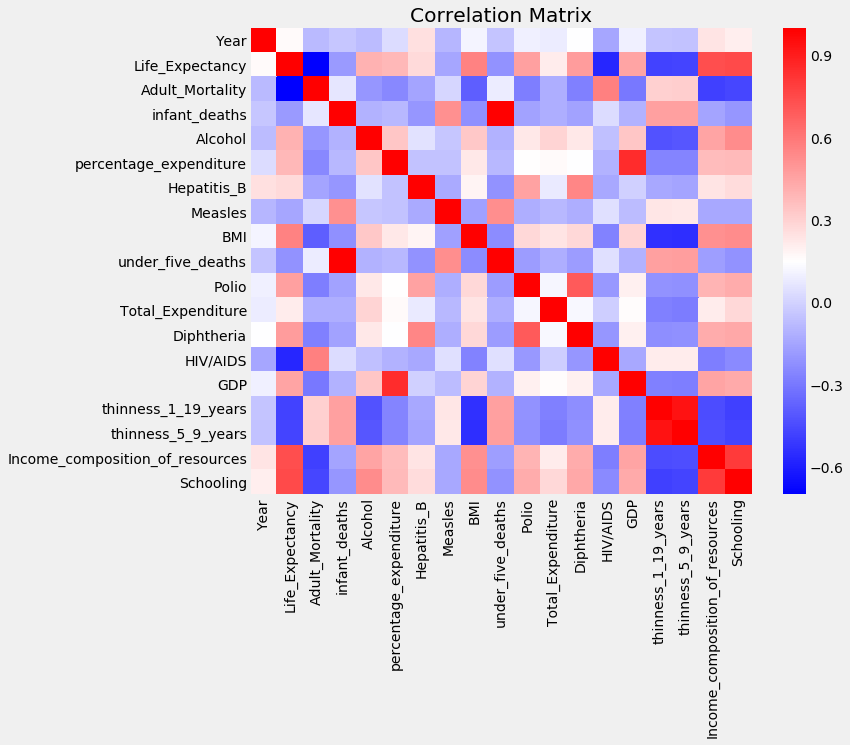

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='bwr')
plt.title('Correlation Matrix')

Chart shows that High correlations on Life Expectancy are with 'Adult_Mortality', 'HIV/AIDS', 'thinness_5_9_years', 'thinness_1_19_years','Income_composition_of_resources', 'Schooling' variables.

In [29]:
y_allValues = LifeExpectancyData_num['Life_Expectancy']
X_allValues = LifeExpectancyData_num[corr_list]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_allValues, y_allValues, test_size = 0.2, random_state = 0)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 2260
Test kümesindeki gözlem sayısı   : 566


We're splitting the data in two, so out of 100 rows, 80 rows will go into the training set, and 20 rows will go into the testing set.

In [31]:
X_train = sm.add_constant(X_train)

tum_degiskenli_model = sm.OLS(y_train, X_train).fit()

tum_degiskenli_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     585.1
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        11:05:34   Log-Likelihood:                -6297.3
No. Observations:                2260   AIC:                         1.263e+04
Df Residuals:                    2241   BIC:                         1.274e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             172.3087     39.540      4.358      0.000      94.770     249.848
Schooling                           0.7155      0.047     15.120      0.000       0.623       0.808
Income_composition_of_resources     8.5581      0.729     11.735      0.000       7.128       9.988
Adult_Mortality                    -0.0169      0.001    -18.017      0.000      -0.019      -0.015
HIV/AIDS                           -0.5600      0.024    -23.020      0.000      -0.608      -0.512
BMI                                 0.0403      0.005      7.416      0.000       0.030       0.051
Diphtheria                          0.0230      0.005      4.325      0.000       0.013       0.033
thinness_1_19_years                -0.0828      0.054     -1.528      0.127      -0.189       0.023
thinness_5_9_years                  0.0131      0.053      0.246      0.806      -0.091       0.118
Polio                               0.0215      0.005      4.339      0.000       0.012       0.031
GDP                              2.453e-05   1.22e-05      2.011      0.044    6.15e-07    4.84e-05
Alcohol                             0.0396      0.027      1.469      0.142      -0.013       0.092
percentage_expenditure              0.0002   8.17e-05      3.047      0.002    8.86e-05       0.000
Hepatitis_B                         0.0003      0.004      0.086      0.931      -0.007       0.007
Total_Expenditure                   0.0339      0.035      0.957      0.339      -0.036       0.103
under_five_deaths                  -0.0633      0.007     -9.504      0.000      -0.076      -0.050
infant_deaths                       0.0849      0.009      9.464      0.000       0.067       0.102
Year                               -0.0592      0.020     -2.994      0.003      -0.098      -0.020
Measles                         -1.392e-05      1e-05     -1.387      0.166   -3.36e-05    5.77e-06
==============================================================================
Omnibus:                      153.315   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.653
Skew:                           0.099   Prob(JB):                    1.60e-153
Kurtosis:                       5.726   Cond. No.                     7.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## ***A new model with 12 variables based on P values***

In [32]:
len(tum_degiskenli_model.pvalues)

19

In [33]:
pDegeri = tum_degiskenli_model.pvalues
anlamli_degerler = list(pDegeri[pDegeri<= 0.05].index)
anlamli_degerler 

['const',
 'Schooling',
 'Income_composition_of_resources',
 'Adult_Mortality',
 'HIV/AIDS',
 'BMI',
 'Diphtheria',
 'Polio',
 'GDP',
 'percentage_expenditure',
 'under_five_deaths',
 'infant_deaths',
 'Year']

In [34]:
anlamli_degerler= anlamli_degerler[1:]

In [35]:
len(anlamli_degerler)

12

In [36]:
anlamli_degerler[0:12]

['Schooling',
 'Income_composition_of_resources',
 'Adult_Mortality',
 'HIV/AIDS',
 'BMI',
 'Diphtheria',
 'Polio',
 'GDP',
 'percentage_expenditure',
 'under_five_deaths',
 'infant_deaths',
 'Year']

In [39]:
anlamli_degerler[0:len(anlamli_degerler)-degisken]

['Schooling', 'Income_composition_of_resources', 'Adult_Mortality', 'HIV/AIDS']

***Using FOR Loop to have all RSquare and p values at once.***

In [46]:
y = LifeExpectancyData_num['Life_Expectancy'] #1den 12 ye kadar dongu

for degisken in range(len(anlamli_degerler)):
    Feature_list= anlamli_degerler[0:len(anlamli_degerler)-degisken]
    X=LifeExpectancyData_num[Feature_list]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train).fit()
    print("degisken Sayisi: {}".format (len(Feature_list)))
    print("R kare degeri: {}".format(model.rsquared))
    print('              ')
    print('p values: {}'.format(model.pvalues))
    print('---------------------------------')

degisken Sayisi: 12
R kare degeri: 0.823326264880927
              
p values: const                             0.000
Schooling                         0.000
Income_composition_of_resources   0.000
Adult_Mortality                   0.000
HIV/AIDS                          0.000
BMI                               0.000
Diphtheria                        0.000
Polio                             0.000
GDP                               0.054
percentage_expenditure            0.001
under_five_deaths                 0.000
infant_deaths                     0.000
Year                              0.000
dtype: float64
---------------------------------
degisken Sayisi: 11
R kare degeri: 0.8223269307687395
              
p values: const                             0.000
Schooling                         0.000
Income_composition_of_resources   0.000
Adult_Mortality                   0.000
HIV/AIDS                          0.000
BMI                               0.000
Diphtheria                        

In [51]:
y_sklearn = LifeExpectancyData_num['Life_Expectancy'] #1den 12 ye kadar dongu

for degisken in range(len(anlamli_degerler)):
    Feature_list= anlamli_degerler[0:len(anlamli_degerler)-degisken]
    X_sklearn=LifeExpectancyData_num[Feature_list]
    X_train, X_test, y_train, y_test = train_test_split(X_sklearn, y_sklearn, test_size = 0.2, random_state = 0)
    model_sklearn = LinearRegression()
    results = model_sklearn.fit(X_train, y_train)
    y_pred = model_sklearn.predict(X_test)
    print("degisken Sayisi: {}".format (len(Feature_list)))
    print("R-Squared Score in Train Group       : {}".format(model_sklearn.score(X_train, y_train)))
    print('              ')
    print("-----Statistics in Test Group---")
    print("R-Squared Score in Test Group        : {}".format(model_sklearn.score(X_test, y_test)))
    print("Mean Absolute Error (MAE)            : {}".format(mean_absolute_error(y_test, y_pred)))
    print("Mean Squared Error  (MSE)            : {}".format(mse(y_test, y_pred)))
    print("Root Mean Squared Error (RMSE)       : {}".format(rmse(y_test, y_pred)))
    print("Mean Absolute Percentage Error(MAPE) : {}".format(np.mean(np.abs((y_test-  y_pred) / y_test)) * 100))
    print('---------------------------------')

degisken Sayisi: 12
R-Squared Score in Train Group       : 0.8233262648809268
              
-----Statistics in Test Group---
R-Squared Score in Test Group        : 0.8308870587051818
Mean Absolute Error (MAE)            : 2.9292711298967986
Mean Squared Error  (MSE)            : 15.771363680617359
Root Mean Squared Error (RMSE)       : 3.9713176252495037
Mean Absolute Percentage Error(MAPE) : 4.500153646079059
---------------------------------
degisken Sayisi: 11
R-Squared Score in Train Group       : 0.8223269307687394
              
-----Statistics in Test Group---
R-Squared Score in Test Group        : 0.8323171947427692
Mean Absolute Error (MAE)            : 2.915098152874087
Mean Squared Error  (MSE)            : 15.637990117430212
Root Mean Squared Error (RMSE)       : 3.9544898681663367
Mean Absolute Percentage Error(MAPE) : 4.480416812444284
---------------------------------
degisken Sayisi: 10
R-Squared Score in Train Group       : 0.8153251512477439
              
-----Stati

TypeError: list indices must be integers or slices, not Series

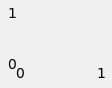

In [77]:
degiskenler = [y_test, y_pred]

plt.figure()

for degisken in range(len(degiskenler)):
    plt.subplot(4, 4, degisken+1)
    plt.scatter(degiskenler[y_test],degiskenler = [y_pred], color="purple" )
    plt.plot(degiskenler[degisken], color="green")
    plt.xlabel("Y Test/Real Values")
    plt.ylabel("Predicted Y")
    plt.title("LIFE EXPECTANCY REAL AND STATISTICAL VALUES")
    plt.show()



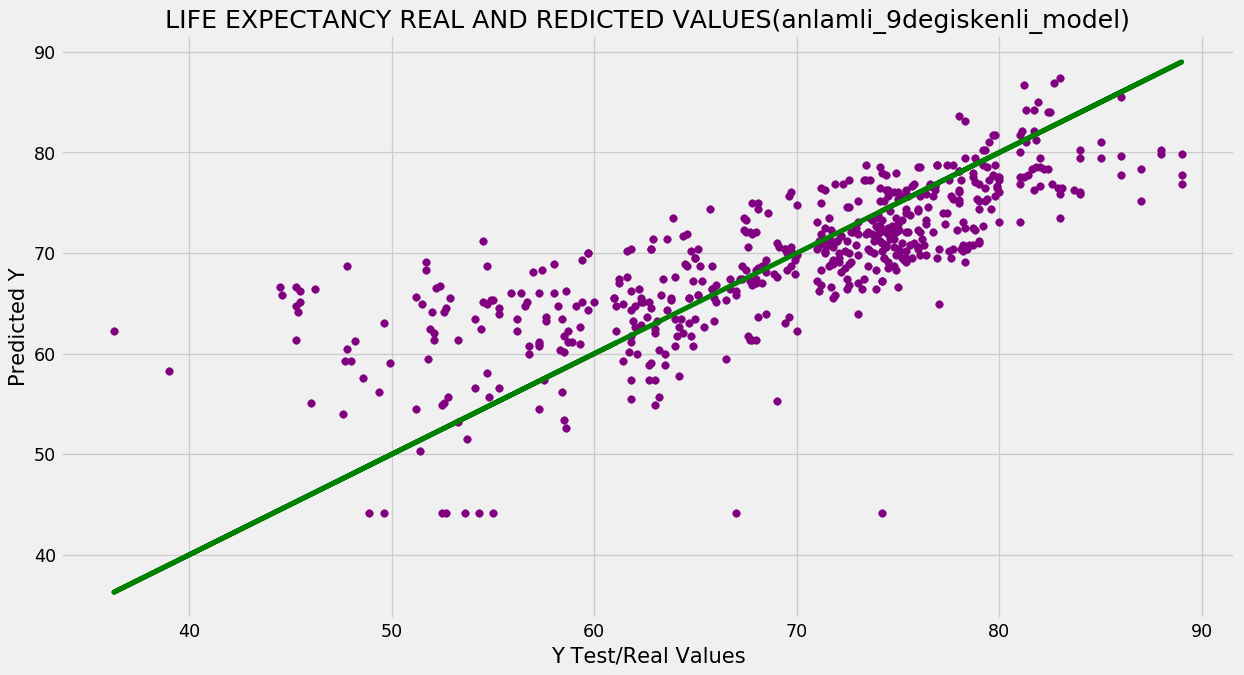

In [68]:
plt.figure(dpi = 90, figsize=(15,8))
plt.scatter(y_test, y_pred,color="purple" )
plt.plot(y_test, y_test, color="green")
plt.xlabel("Y Test/Real Values")
plt.ylabel("Predicted Y")
plt.title("LIFE EXPECTANCY REAL AND REDICTED VALUES(anlamli_9degiskenli_model)")
plt.show()

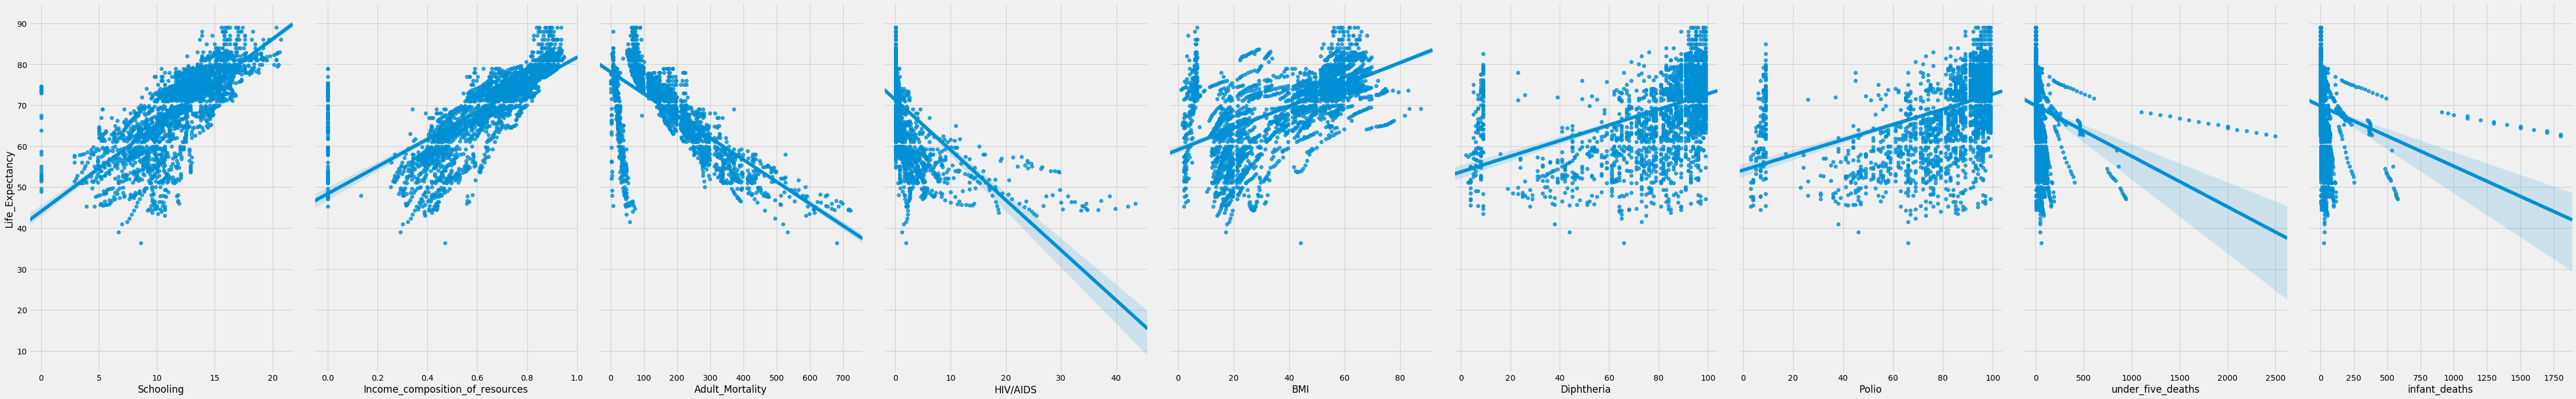

In [69]:
sns.pairplot(LifeExpectancyData_num, x_vars=['Schooling', 'Income_composition_of_resources', 'Adult_Mortality', 'HIV/AIDS', 'BMI',
 'Diphtheria', 'Polio', 'under_five_deaths', 'infant_deaths'], y_vars='Life_Expectancy', size=10, aspect=0.7, kind='reg')

In [78]:
print("R-Squared Score değeri        : {}".format(anlamli_9degiskenli_model.score(X_train, y_train)))


R-Squared Score değeri        : 0.815345502058267


In [79]:
print("R-Squared Score in Train Group       : {}".format(anlamli_9degiskenli_model.score(X_train, y_train)))
print("-----Statistics in Test Group---")
print("R-Squared Score in Test Group        : {}".format(anlamli_9degiskenli_model.score(X_test, y_test)))
print("Mean Absolute Error (MAE)            : {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Squared Error  (MSE)            : {}".format(mse(y_test, y_pred)))
print("Root Mean Squared Error (RMSE)       : {}".format(rmse(y_test, y_pred)))
print("Mean Absolute Percentage Error(MAPE) : {}".format(np.mean(np.abs((y_test-  y_pred) / y_test)) * 100))

R-Squared Score in Train Group       : 0.815345502058267
-----Statistics in Test Group---
R-Squared Score in Test Group        : 0.8265233173690776
Mean Absolute Error (MAE)            : 2.935523755014326
Mean Squared Error  (MSE)            : 16.178323379224114
Root Mean Squared Error (RMSE)       : 4.022228658247081
Mean Absolute Percentage Error(MAPE) : 4.514688309195997


We will use some Variance Analysis in Regression models in order to determine whether regression models are accurate or misleading. Following a flawed model is a bad idea, so it is important that we can quantify how accurate our model is.

# Parametreleri küçültür, bu nedenle çoğunlukla çoklu bağlantıyı önlemek için kullanılır.
# -Model karmaşıklığını, katsayılı büzülme ile azaltır.
# -L2 düzenlileştirme tekniğini kullanır. (bu çalışmada daha sonra tartışacağız) Şimdi düzenlileştirmeyi(regularization) de kullanan başka bir regresyon tekniği türünü inceleyelim.

# Ridge

In [80]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=10**3) 
ridgeregr.fit(X_train, y_train)

y_train_ridge_preds = ridgeregr.predict(X_train)
y_Ridge_preds = ridgeregr.predict(X_test)

In [81]:
print("R-Squared Score in Train Group    : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(ridgeregr.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_Ridge_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_Ridge_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_Ridge_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_Ridge_preds) / y_test)) * 100))

R-Squared Score in Train Group    : 0.8016782568387549
-----Statistics in Test Group---
R-Squared Score in Test Group     : 0.8247003335007767
Mean Absolute Error (MAE)         : 2.9913284370542277
Mean Squared Error (MSE)          : 16.34833367737599
Root Mean Squared Error (RMSE)    : 4.043307269720667
Mean Absolute Percentage Error  (MAPE) : 4.5856028747034445


In [82]:
ridgeregr = Ridge(alpha=10**5) #Ridge(alpha=0.5, normalize=True)
ridgeregr.fit(X_train, y_train)

y_train_ridge_preds = ridgeregr.predict(X_train)
y_Ridge_preds = ridgeregr.predict(X_test)

In [83]:
print("R-Squared Score in Train Group    : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(ridgeregr.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_Ridge_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_Ridge_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_Ridge_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_Ridge_preds) / y_test)) * 100))

R-Squared Score in Train Group    : 0.7013714793161303
-----Statistics in Test Group---
R-Squared Score in Test Group     : 0.7300647069444489
Mean Absolute Error (MAE)         : 3.6447504761916227
Mean Squared Error (MSE)          : 25.173991087952103
Root Mean Squared Error (RMSE)    : 5.017368940784812
Mean Absolute Percentage Error  (MAPE) : 5.5092054082210185


In [84]:
ridgeregr = Ridge(alpha=10**10) 
ridgeregr.fit(X_train, y_train)

y_train_ridge_preds = ridgeregr.predict(X_train)
y_Ridge_preds = ridgeregr.predict(X_test)

In [85]:
print("R-Squared Score in Train Group    : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(ridgeregr.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_Ridge_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_Ridge_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_Ridge_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_Ridge_preds) / y_test)) * 100))

R-Squared Score in Train Group    : 0.004204231104994127
-----Statistics in Test Group---
R-Squared Score in Test Group     : 0.0038255648791137853
Mean Absolute Error (MAE)         : 7.889632588979564
Mean Squared Error (MSE)          : 92.90258442277154
Root Mean Squared Error (RMSE)    : 9.638598675262475
Mean Absolute Percentage Error  (MAPE) : 12.355619932322023


# Lasso 

In [86]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**3) 
lassoregr.fit(X_train, y_train)

y_train_Lasso_preds = lassoregr.predict(X_train)
y_Lasso_preds = lassoregr.predict(X_test)

In [87]:
print("R-Squared Score in Train Group    : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(ridgeregr.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_Lasso_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_Lasso_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_Lasso_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_Lasso_preds) / y_test)) * 100))

R-Squared Score in Train Group    : 0.004204231104994127
-----Statistics in Test Group---
R-Squared Score in Test Group     : 0.0038255648791137853
Mean Absolute Error (MAE)         : 7.906212670815223
Mean Squared Error (MSE)          : 93.2881718465824
Root Mean Squared Error (RMSE)    : 9.658580218985728
Mean Absolute Percentage Error  (MAPE) : 12.381782732012637


In [88]:
lassoregr = Lasso(alpha=10**5) 
lassoregr.fit(X_train, y_train)

y_train_Lasso_preds = lassoregr.predict(X_train)
y_Lasso_preds = lassoregr.predict(X_test)

In [89]:
print("R-Squared Score in Train Group    : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(ridgeregr.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_Lasso_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_Lasso_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_Lasso_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_Lasso_preds) / y_test)) * 100))

R-Squared Score in Train Group    : 0.004204231104994127
-----Statistics in Test Group---
R-Squared Score in Test Group     : 0.0038255648791137853
Mean Absolute Error (MAE)         : 7.906212670815223
Mean Squared Error (MSE)          : 93.2881718465824
Root Mean Squared Error (RMSE)    : 9.658580218985728
Mean Absolute Percentage Error  (MAPE) : 12.381782732012637


In [90]:
lassoregr = Lasso(alpha=10**10) 
lassoregr.fit(X_train, y_train)

y_train_Lasso_preds = lassoregr.predict(X_train)
y_Lasso_preds = lassoregr.predict(X_test)

In [91]:
print("R-Squared Score in Train Group    : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(ridgeregr.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_Lasso_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_Lasso_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_Lasso_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_Lasso_preds) / y_test)) * 100))

R-Squared Score in Train Group    : 0.004204231104994127
-----Statistics in Test Group---
R-Squared Score in Test Group     : 0.0038255648791137853
Mean Absolute Error (MAE)         : 7.906212670815223
Mean Squared Error (MSE)          : 93.2881718465824
Root Mean Squared Error (RMSE)    : 9.658580218985728
Mean Absolute Percentage Error  (MAPE) : 12.381782732012637


# ElasticNet 

In [92]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**3, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

y_train_Elastic_preds = elasticregr.predict(X_train)
y_test_elastic_preds = elasticregr.predict(X_test)

In [93]:
print("R-Squared Score in Train Group    : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Statistics in Test Group---")

print("R-Squared Score in Test Group     : {}".format(ridgeregr.score(X_test, y_test)))

print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y_test, y_test_elastic_preds)))
print("Mean Squared Error (MSE)          : {}".format(mse(y_test, y_test_elastic_preds)))
print("Root Mean Squared Error (RMSE)    : {}".format(rmse(y_test, y_test_elastic_preds)))
print("Mean Absolute Percentage Error  (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_elastic_preds) / y_test)) * 100))

R-Squared Score in Train Group    : 0.004204231104994127
-----Statistics in Test Group---
R-Squared Score in Test Group     : 0.0038255648791137853
Mean Absolute Error (MAE)         : 6.580510762786741
Mean Squared Error (MSE)          : 65.21304312449972
Root Mean Squared Error (RMSE)    : 8.075459313531319
Mean Absolute Percentage Error  (MAPE) : 10.244120700643965


In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error

In [95]:
skorer = make_scorer(mean_absolute_error)

In [96]:
lrm = LinearRegression() #once modeli belirtti
lrm_cv = cross_val_score(estimator=lrm, X=X, y=y,cv=10, scoring=skorer)#estimater lrm girildi X ve y ayrilmadan modele konuldu
#skoring degerine istedigimiz yazabiliyoruz such as rkare,vs 
#https://scikit-learn.org/stable/modules/model_evaluation.html#
print(lrm_cv)
print(lrm_cv.mean())

[3.07174031 3.49390386 2.48188642 3.43344879 3.0866417  3.09318078
 2.90942221 3.00933149 3.10482195 2.70801916]
3.039239666129277


In [97]:
alphas = [- 100, -10, -1, 
          0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000] 

In [98]:
ridge_mean_list = []
for alpha in alphas:
    ridgeregr = Ridge(alpha=alpha)
    ridge_cv = cross_val_score(estimator=ridgeregr, X=X, y=y,cv=10, scoring=skorer)
    ridge_mean_list.append(ridge_cv.mean())
print(ridge_mean_list)

[3.2980402194461518, 3.0367408737878927, 3.0382712052705587, 3.0392396661293537, 3.040179492685518, 3.0487723481997246, 3.1051458482643453, 3.148286295080099, 3.2765426157275286, 3.766463191881267, 4.114684643598382, 4.894035088913243]


In [99]:
lasso_mean_list = []
lassoregr = Lasso() 
for alpha in alphas:
    lassoregr = Lasso(alpha=alpha)
    lasso_cv = cross_val_score(estimator=lassoregr, X=X, y=y,cv=10, scoring=skorer)
    lasso_mean_list.append(lasso_cv.mean())
print(lasso_mean_list)

[492.2078203583891, 50.172269846850114, 5.3220505098839235, 3.0335917119408897, 3.1598667294467124, 4.08327351471352, 4.957551143376359, 7.7276300028357285, 7.7276300028357285, 7.7276300028357285, 7.7276300028357285, 7.7276300028357285]


In [100]:
from sklearn.linear_model import Lasso
elasticnet_mean_list = []
for alpha in alphas:
    elasticregr = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elasticnet_cv = cross_val_score(estimator=elasticregr, X=X, y=y,cv=10, scoring=skorer)
    elasticnet_mean_list.append(elasticnet_cv.mean())
print(elasticnet_mean_list)

[197.69670771564773, 22.165266904098974, 3.220741790214318, 3.0335917119408897, 3.1564419957803826, 3.786358642772047, 4.701798116090837, 6.407018248945185, 7.7276300028357285, 7.7276300028357285, 7.7276300028357285, 7.7276300028357285]


In [101]:
model_ortalamaları = list(zip(alphas, ridge_mean_list, lasso_mean_list, elasticnet_mean_list))

In [102]:
df = pd.DataFrame(model_ortalamaları, columns=['alpha', 'Ridge_MSA', 'Lasso_MSA', 
                                               'ElasticNet_MSA'])
df

,alpha,Ridge_MSA,Lasso_MSA,ElasticNet_MSA
0,-100,3.298,492.208,197.697
1,-10,3.037,50.172,22.165
2,-1,3.038,5.322,3.221
3,0,3.039,3.034,3.034
4,1,3.040,3.160,3.156
5,10,3.049,4.083,3.786
6,100,3.105,4.958,4.702
7,1000,3.148,7.728,6.407
8,10000,3.277,7.728,7.728
9,100000,3.766,7.728,7.728


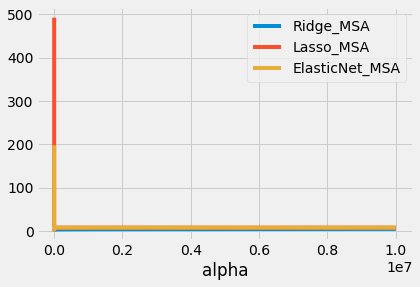

In [103]:
df.plot('alpha', ['Ridge_MSA', 'Lasso_MSA', 'ElasticNet_MSA'])
plt.show()

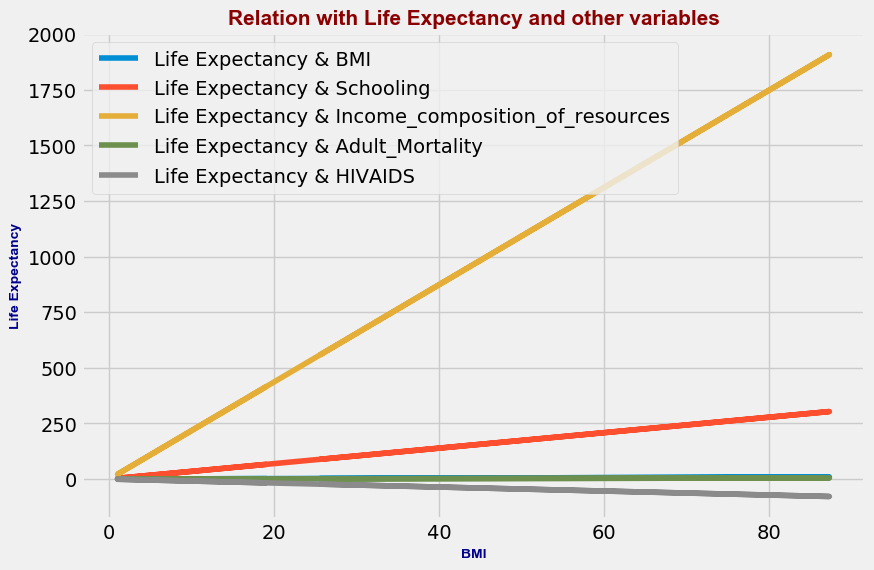

In [104]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(9,6), dpi = 100)

Life_Expectancy_BMI = X_9degiskenli_anlamli.BMI * 0.1064
Life_Expectancy_Schooling = X_9degiskenli_anlamli.BMI * 3.4765
Life_Expectancy_Income_composition_of_resources = X_9degiskenli_anlamli.BMI * 21.8546
Life_Expectancy_Adult_Mortality = X_9degiskenli_anlamli.BMI * 0.0555
Life_Expectancy_HIVAIDS = X_9degiskenli_anlamli.BMI * (-0.8977)


plt.plot(X_9degiskenli_anlamli.BMI, Life_Expectancy_BMI)
plt.plot(X_9degiskenli_anlamli.BMI, Life_Expectancy_Schooling)
plt.plot(X_9degiskenli_anlamli.BMI, Life_Expectancy_Income_composition_of_resources)
plt.plot(X_9degiskenli_anlamli.BMI, Life_Expectancy_Adult_Mortality)
plt.plot(X_9degiskenli_anlamli.BMI, Life_Expectancy_HIVAIDS)

plt.legend(["Life Expectancy & BMI", "Life Expectancy & Schooling", "Life Expectancy & Income_composition_of_resources", "Life Expectancy & Adult_Mortality", "Life Expectancy & HIVAIDS"])
plt.xlabel("BMI", fontdict=eksen_font)
plt.ylabel("Life Expectancy", fontdict=eksen_font)
plt.title("Relation with Life Expectancy and other variables", fontdict=baslik_font)

plt.show()